<a href="https://colab.research.google.com/github/drk-knght/DL_Project/blob/main/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/mnist/fashion-mnist_train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/mnist/fashion-mnist_test.csv')

In [ ]:
df_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,37,93,72,58,55,63,66,89,159,120,20,0,0,0,0,1,0,0,0,0,0,0,1,0,0,22,67,125,151,168,...,112,115,117,117,113,146,41,0,3,0,0,0,0,0,0,0,1,0,1,76,54,55,51,53,53,55,53,44,38,37,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,0,0,76,36,110,170,78,136,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,...,94,84,70,44,0,36,152,65,110,0,0,0,0,0,0,0,21,57,89,7,0,0,0,0,0,0,0,0,0,0,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,0,1,3,0,14,152,184,158,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,...,219,223,226,239,247,241,224,213,144,0,0,0,0,0,0,1,0,44,232,199,200,190,180,179,185,189,191,185,179,178,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,131,192,79,0,0,0,0,...,13,26,17,8,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
test_sample,validation_sample=np.split(df_train.sample(frac=1,random_state=42),[int(0.9*len(df_train))])

In [ ]:
test_sample

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
12628,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37730,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,...,237,233,228,227,223,222,217,208,206,215,255,0,0,102,191,189,182,183,181,181,180,180,180,180,179,171,173,175,175,181,187,190,196,201,209,221,218,211,102,0
39991,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8525,5,0,0,0,0,0,0,0,0,0,0,0,0,0,37,109,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,72,126,111,97,103,28,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
8279,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19610,1,0,0,0,0,0,0,0,0,0,0,96,172,135,141,132,122,121,138,127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,214,...,234,236,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,143,160,129,0,3,176,158,72,0,0,0,0,0,0,0,0,0
52113,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54941,2,0,0,0,1,0,1,0,0,0,45,86,217,178,136,153,202,218,88,22,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,35,85,114,115,100,...,187,154,107,69,0,0,53,209,179,39,0,0,0,0,22,134,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,104,133,13,0,0
28554,4,0,0,0,0,0,0,0,1,0,0,0,27,108,145,156,146,114,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,131,227,...,190,202,183,206,162,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,77,112,119,124,127,139,108,98,93,78,39,0,0,1,1,0,0,0,0


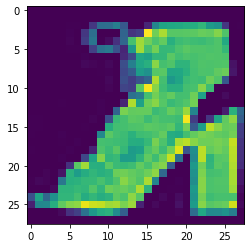

In [ ]:
img=test_sample.iloc[10,1:].values.reshape(28,28)
plt.imshow(img)

In [ ]:
# train_sample
train_x=test_sample.drop(labels='label',axis=1)
train_y=test_sample['label']

validation_x=validation_sample.drop(labels='label',axis=1)
validation_y=validation_sample['label']

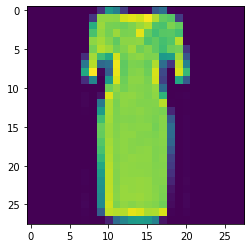

In [ ]:
validation_sample
img=validation_sample.iloc[0,1:].values.reshape((28,28))
plt.imshow(img)
plt.show()

In [ ]:
print(train_x.shape)
print(train_y.shape)

print(validation_x.shape)
print(validation_y.shape)

(54000, 784)
(54000,)
(6000, 784)
(6000,)


In [ ]:
train_x=train_x.astype('float32')
train_y=train_y.astype('float32')

validation_x=validation_x.astype('float32')
validation_y=validation_y.astype('float32')

train_x=train_x/255.
# train_y=train_y/255.

validation_x=validation_x/255.
# validation_y=validation_y/255.

# one hot encoding
num_garments=10

train_y=tf.keras.utils.to_categorical(train_y,num_classes=num_garments)

validation_y=tf.keras.utils.to_categorical(validation_y,num_classes=num_garments)

In [ ]:
train_y.shape

(54000, 10)

In [ ]:
input_layer=784
output_layer=10
hidden_layer=50

model=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [79]:
number_of_epochs=200

model.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/200
1688/1688 - 3s - loss: 0.2577 - accuracy: 0.9034 - val_loss: 0.3297 - val_accuracy: 0.8815
Epoch 2/200
1688/1688 - 3s - loss: 0.2511 - accuracy: 0.9056 - val_loss: 0.3155 - val_accuracy: 0.8892
Epoch 3/200
1688/1688 - 3s - loss: 0.2448 - accuracy: 0.9083 - val_loss: 0.3175 - val_accuracy: 0.8913
Epoch 4/200
1688/1688 - 3s - loss: 0.2397 - accuracy: 0.9099 - val_loss: 0.3361 - val_accuracy: 0.8870
Epoch 5/200
1688/1688 - 3s - loss: 0.2345 - accuracy: 0.9112 - val_loss: 0.3350 - val_accuracy: 0.8845
Epoch 6/200
1688/1688 - 3s - loss: 0.2297 - accuracy: 0.9132 - val_loss: 0.3494 - val_accuracy: 0.8803
Epoch 7/200
1688/1688 - 3s - loss: 0.2236 - accuracy: 0.9158 - val_loss: 0.3476 - val_accuracy: 0.8785
Epoch 8/200
1688/1688 - 3s - loss: 0.2182 - accuracy: 0.9181 - val_loss: 0.3250 - val_accuracy: 0.8875
Epoch 9/200
1688/1688 - 3s - loss: 0.2161 - accuracy: 0.9184 - val_loss: 0.3221 - val_accuracy: 0.8923
Epoch 10/200
1688/1688 - 3s - loss: 0.2110 - accuracy: 0.9208 - val_loss:

In [80]:
test_x=df_test.drop(labels='label',axis=1)
test_y=df_test['label']
test_y=tf.keras.utils.to_categorical(test_y,num_garments)

In [81]:
test_y.shape

(10000, 10)

In [82]:
test_loss,test_accuracy=model.evaluate(test_x,test_y)

313/313 [==============================] - 1s 2ms/step - loss: 324.5644 - accuracy: 0.8311


In [92]:
input_layer2=784
output_layer2=10
hidden_layer2=16

model2=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(784,)),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(hidden_layer,activation='relu'),
                           tf.keras.layers.Dense(output_layer,activation='softmax'),
                          ])

In [93]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [94]:
number_of_epochs=50

model2.fit(train_x,train_y,epochs=number_of_epochs,verbose=2,validation_data=(validation_x,validation_y))

Epoch 1/50
1688/1688 - 26s - loss: 0.5528 - accuracy: 0.8013 - val_loss: 0.4498 - val_accuracy: 0.8420
Epoch 2/50
1688/1688 - 3s - loss: 0.3984 - accuracy: 0.8557 - val_loss: 0.3874 - val_accuracy: 0.8600
Epoch 3/50
1688/1688 - 3s - loss: 0.3651 - accuracy: 0.8666 - val_loss: 0.3975 - val_accuracy: 0.8588
Epoch 4/50
1688/1688 - 3s - loss: 0.3395 - accuracy: 0.8752 - val_loss: 0.3312 - val_accuracy: 0.8853
Epoch 5/50
1688/1688 - 3s - loss: 0.3252 - accuracy: 0.8801 - val_loss: 0.3425 - val_accuracy: 0.8743
Epoch 6/50
1688/1688 - 3s - loss: 0.3092 - accuracy: 0.8845 - val_loss: 0.3529 - val_accuracy: 0.8728
Epoch 7/50
1688/1688 - 3s - loss: 0.3025 - accuracy: 0.8876 - val_loss: 0.3331 - val_accuracy: 0.8820
Epoch 8/50
1688/1688 - 3s - loss: 0.2883 - accuracy: 0.8929 - val_loss: 0.3270 - val_accuracy: 0.8823
Epoch 9/50
1688/1688 - 3s - loss: 0.2824 - accuracy: 0.8952 - val_loss: 0.3102 - val_accuracy: 0.8883
Epoch 10/50
1688/1688 - 3s - loss: 0.2753 - accuracy: 0.8962 - val_loss: 0.3694 -

In [95]:
test_x=df_test.drop(labels='label',axis=1)
test_y=df_test['label']
test_y=tf.keras.utils.to_categorical(test_y,num_garments)

In [96]:
test_loss,test_accuracy=model.evaluate(test_x,test_y)

313/313 [==============================] - 0s 1ms/step - loss: 58.7366 - accuracy: 0.1294


1.ReLu
  2 hidden, 16 nodes, 10 epochs, crossentropy
  2 hidden, 32 nodes, 10 epochs, kl divergence
  4 hidden, 16 nodes, 10 epochs, crossentropy
  4 hidden, 32 nodes, 10 epochs, kl divergence
  more accurate (2 models)

2.Sigmoid
  2 hidden, 16 nodes, 10 epochs, crossentropy
  2 hidden, 32 nodes, 10 epochs, kl divergence
  4 hidden, 16 nodes, 10 epochs, crossentropy
  4 hidden, 32 nodes, 10 epochs, kl divergence
  more accurate (2 models)

3.Tanh
  2 hidden, 16 nodes, 10 epochs, crossentropy
  2 hidden, 32 nodes, 10 epochs, kl divergence
  4 hidden, 16 nodes, 10 epochs, crossentropy
  4 hidden, 16 nodes, 10 epochs, kl divergence
  more accurate (2 models)